In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nba2k_data = pd.read_csv('nba2k20-full.csv')
nba2k_data.head(20)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas


### Histogram: Distribution of Player's Ratings

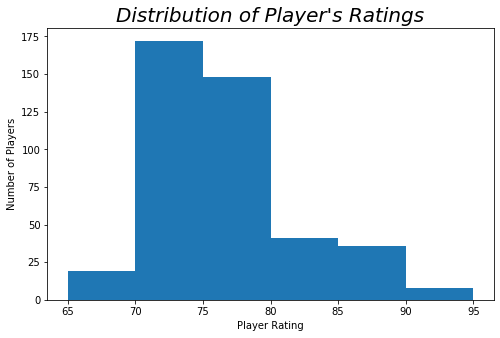

In [3]:
bins = list(range(65,100,5)) #change step size if you want a more precise plot
plt.figure(figsize=(8,5))
plt.hist(nba2k_data.rating, bins = bins)
plt.xticks(bins)
plt.title(label="Distribution of Player's Ratings",fontsize=20,fontstyle='italic')
plt.xlabel('Player Rating')
plt.ylabel('Number of Players')
plt.savefig("Histogram_DistributionofPlayer'sRatings.png",dpi=300)
plt.show()

### Box & Whiskers Plot: Player Ratings by Position

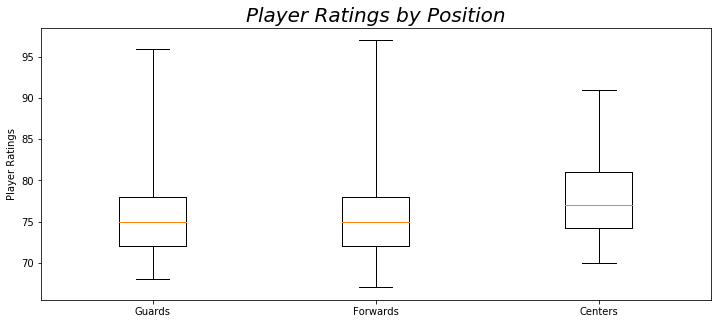

In [4]:
guards = nba2k_data[(nba2k_data.position=='G')|(nba2k_data.position=='G-F')]
forwards = nba2k_data[(nba2k_data.position=='F')|(nba2k_data.position=='F-G')|(nba2k_data.position=='F-C')]
centers = nba2k_data[(nba2k_data.position=='C')|(nba2k_data.position=='C-F')]

plt.figure(figsize=(12,5))
# set whis = 'range' to get min, Q1,Q2,Q3, max
# by default, whis = 1.5, so you get Q1-1.5*IQR,Q1,Q2,Q3,Q3+1.5*IQR, points above or below will be considered outliers and marked as circles
plt.boxplot([guards['rating'],forwards['rating'],centers['rating']], labels = ['Guards','Forwards','Centers'], whis='range')
plt.ylabel('Player Ratings')
plt.title('Player Ratings by Position',fontsize=20,fontstyle='italic')
plt.savefig('Box&WhiskersPlot_PlayerRatingsByPosition.png',dpi =300)
plt.show()

### Pie Chart: Player Position

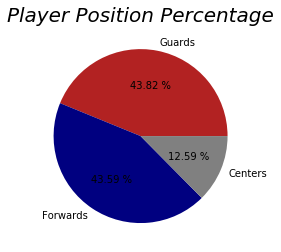

In [5]:
num_guards = guards.count()[0]
num_forwards = forwards.count()[0]
num_centers = centers.count()[0]

labels = ['Guards','Forwards','Centers']

colors = ['firebrick','navy','gray']
plt.pie([num_guards,num_forwards,num_centers], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Player Position Percentage',fontsize=20,fontstyle='italic')
plt.savefig('PieChart_PlayerPosition.png',dpi=300)
plt.show()


### Histogram: Player Draft Year

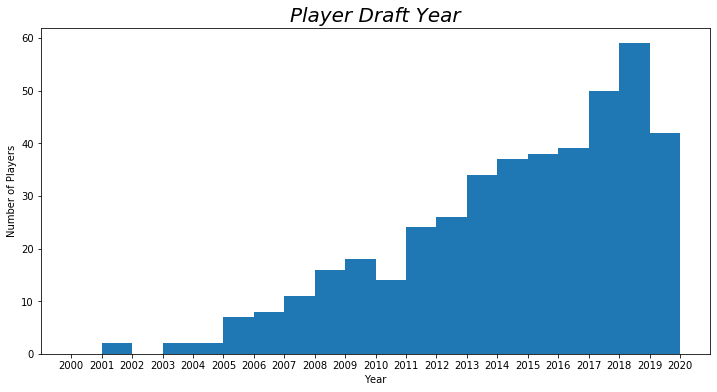

In [6]:
draft_year = nba2k_data['draft_year']
bins = list(range(2000,2021,1))
plt.figure(figsize = (12,6))
plt.hist(draft_year, bins=bins)
plt.xticks(bins)
plt.title('Player Draft Year',fontsize=20,fontstyle='italic')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.savefig('Histogram_PlayerDraftYear.png',dpi=300)
plt.show()

### Pie Chart: Draft Round

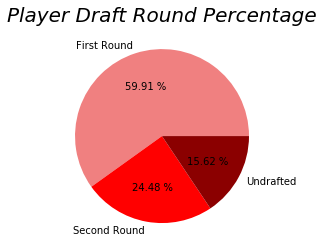

In [7]:
first_round = nba2k_data[nba2k_data.draft_round == str(1)].count()[0]
second_round = nba2k_data[nba2k_data.draft_round == str(2)].count()[0]
undrafted = nba2k_data[nba2k_data.draft_round == 'Undrafted'].count()[0]

labels = ['First Round','Second Round','Undrafted']
colors = ['lightcoral','red','darkred']
plt.pie([first_round,second_round,undrafted], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Player Draft Round Percentage',fontsize=20,fontstyle='italic')
plt.savefig('PieChart_PlayerDraftRound.png',dpi=300)
plt.show()


### Histogram, Pie Chart: Player Height

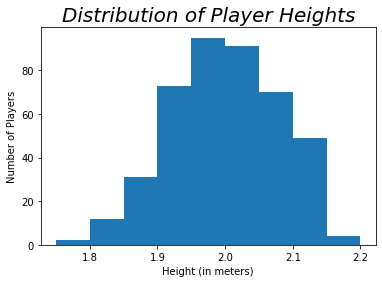

In [8]:
def extractHeight(list1):
    '''This function extracts the height in meters and appends it to a list, which is returned'''
    height_list = []
    for item in list1:
        [h_feet,h_meters] = list(item.split('/'))
        #(feet,inches) = tuple(map(int,h_feet.split('-')))
        height_list.append(float(h_meters))
    return height_list
heights_meters = extractHeight(nba2k_data.height.tolist())
height_bins = list(range(175,225,5))
bins = [x/100 for x in height_bins]
plt.hist(heights_meters, bins = bins)
plt.xlabel('Height (in meters)')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Heights',fontsize=20,fontstyle='italic')
plt.savefig('Histogram_PlayerHeight.png',dpi=300)
plt.show()



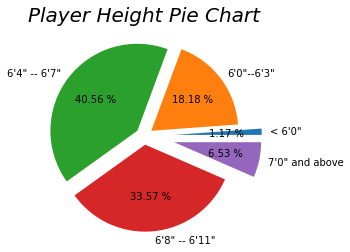

In [9]:
def numPlayers(listvar, t1 = 1.72, t2 = 2.26):
    '''This function returns the number of elements/items in a list that lie between 2 threshold values'''
    # t1: lower threshold (inclusive)
    # t2: upper threshold (exclusive)
    total = 0
    for num in listvar:
        if (num < t1) or (num >= t2) :
            continue
        elif num >= t1 and num < t2:
            total += 1
    return total
very_short = numPlayers(heights_meters, t2 = 1.82) #less than 6 feet
short = numPlayers(heights_meters, t1 = 1.83, t2= 1.92) # 6'0" -- 6'3"
medium = numPlayers(heights_meters, t1 = 1.93, t2 =2.02) # 6'4" -- 6'7"
tall = numPlayers(heights_meters, t1 = 2.03, t2= 2.12) # 6'8" -- 6'11"
very_tall = numPlayers(heights_meters, t1 = 2.13) # 7'0" and above 

labels = ['''< 6'0"''','''6'0"--6'3"''','''6'4" -- 6'7"''','''6'8" -- 6'11"''','''7'0" and above''']
explode = [.35,.1,.1,.1,.35]
plt.pie([very_short, short, medium, tall, very_tall], labels = labels , explode = explode, autopct = '%.2f %%')
plt.title('Player Height Pie Chart',fontsize=20,fontstyle='italic')
plt.savefig('PieChart_PlayerHeight.png',dpi = 300)
plt.show()

### Pie Chart: Player Nationality

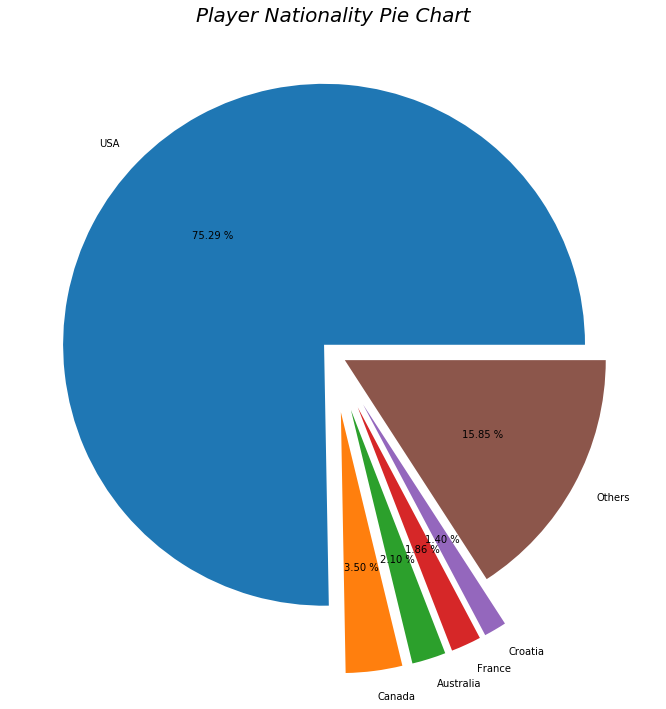

In [10]:
def countries_dict(listvar):
    '''This function takes a list of countries and returns a dictionary containing the number of players that come from those countries'''
    countries = {}
    for item in listvar:
        if item not  in countries:
            countries[item] = 0
        countries[item] += 1
    return countries
# lambda function to get the value associated with a particular key in a dictionary
fetch_value = (lambda x:nationality_dict[x])

nationality_dict = countries_dict(nba2k_data.country.tolist())
# sort the keys/country names based on the value in descending order
sorted_order = sorted(nationality_dict , key = fetch_value, reverse = True)
# Taking the 5 countries with the largest number of NBA players, and obtaining the number of players.
nationalities = [nationality_dict[x] for x in sorted_order[:5]]
# Accumulating the players that come from the other countries into another category
others = sum([nationality_dict[country] for country in sorted_order[5:]])

plt.figure(figsize = (12,12))
labels = sorted_order[:5]+['Others']
explode = [.05,.225,.225,.225,.225,.05]
plt.pie(nationalities + [others], labels = labels, explode = explode, labeldistance = 1.1,autopct = '%.2f %%')
plt.title('Player Nationality Pie Chart',fontsize=20,fontstyle='italic')
plt.savefig('PieChart_PlayerNationality.png',dpi= 300)
plt.show()


### Pie Chart: Player Salary

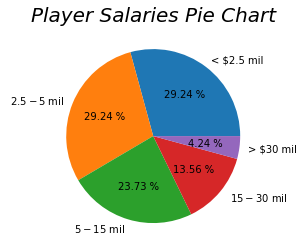

In [11]:
def extractSalary(listvar):
    '''This function extracts the salary and appends the integer value to a list, which is returned.'''
    salary_list = []
    for item in listvar:
        salary_list.append(int(str(item)[1:]))
    return salary_list
player_salaries = extractSalary(nba2k_data.salary.tolist())

def salaryRange(listvar, t1 = 0, t2 = 50000000):
    'This function returns the number of players that have a salary between t1 and t2.'
    # t1: Lower threshold (inclusive)
    # t2: Upper threshold (exclusive)
    total = 0
    for x in listvar:
        if (x >= t1) and (x < t2):
            total += 1
        else:
            continue
    return total
# Separating the players into categories based on their salary
category1 = salaryRange(player_salaries, t2 = 2500000)  # Minimum Deal
category2 = salaryRange(player_salaries, t1 = 2500000, t2 = 5000000) # Role Player
category3 = salaryRange(player_salaries, t1 = 5000000, t2 = 15000000) # Solid Player
category4 = salaryRange(player_salaries, t1 = 15000000, t2 = 30000000)  # 2 or 3 option/Star player
category5 = salaryRange(player_salaries, t1 = 30000000) # 1 or 2 option/Superstar

labels = ['''< $2.5 mil''',''' $2.5- $5 mil''',''' $5- $15 mil''',''' $15- $30 mil''','''> $30 mil''']
plt.pie([category1,category1,category3,category4,category5], labels = labels, autopct = '%.2f %%')
plt.title('Player Salaries Pie Chart',fontsize=20,fontstyle='italic')
plt.savefig('PieChart_PlayerSalaries.png',dpi=300)
plt.show()

### Histogram: Player Ages

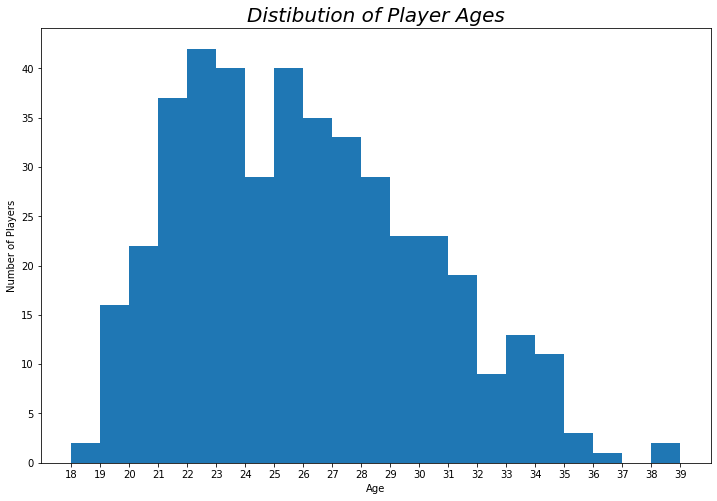

In [12]:
import datetime
def extractAge(dates, release_date):
    '''This function returns a list of the ages of the players (as of September 5, 2019) from a list of strings, where each string represents a players birth date'''
    release_date = datetime.datetime.strptime(release_date,'%x')
    dates_list = []
    player_ages = []
    for date in dates:
        date = datetime.datetime.strptime(date,'%x')
        dates_list.append(date)
        age = release_date.year - date.year - ((release_date.month, release_date.day) < (date.month, date.day))
        player_ages.append(age)
    return player_ages

release_date = '09/05/19'
dates = nba2k_data.b_day.tolist()
player_ages = extractAge(dates, release_date)

plt.figure(figsize = (12,8))
bins = list(range(18,40,1))
plt.hist(player_ages, bins = bins)
plt.title('Distibution of Player Ages', fontsize=20,fontstyle='italic')
plt.xticks(bins)
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.savefig('Histogram_PlayerAges.png', dpi=300)
plt.show()